In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
for i in range(10):
  print(np.sum(y_train == i))

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


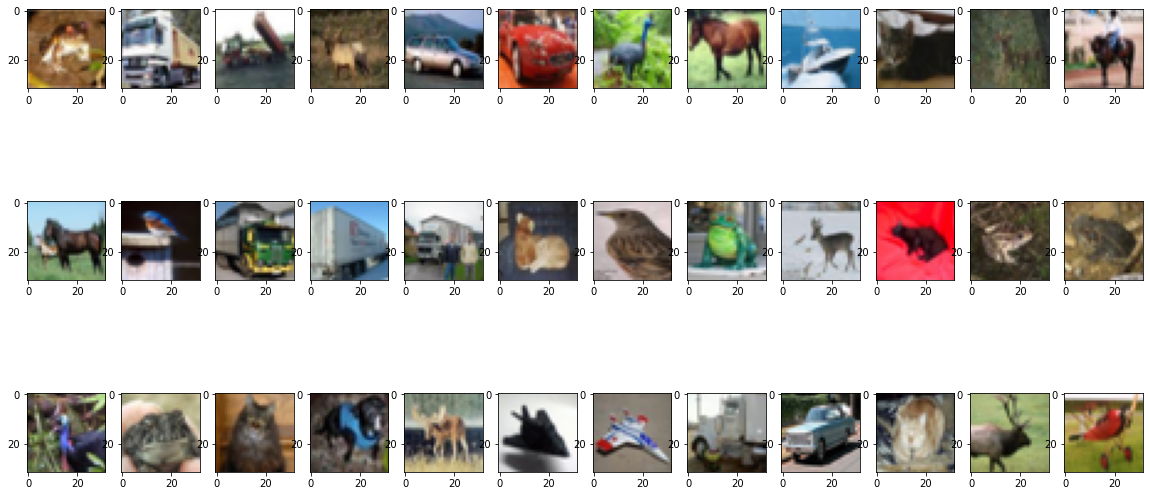

In [ ]:
fig = plt.figure(figsize = (20, 10))

for i in range(36):
  ax = fig.add_subplot(3, 12, i+1)
  ax.imshow(np.squeeze(X_train[i]))

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

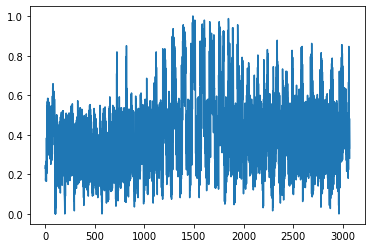

In [ ]:
x = list(range(len(np.reshape(X_train[0], (-1)))))

plt.plot(x, np.reshape(X_train[0], (-1)))

In [ ]:
X_train, y_train = X_train[:40000], y_train[:40000]
X_valid, y_valid = X_train[40000:], y_train[40000:]

AlexNet

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(48, 3, padding='same', activation='relu', input_shape = (32, 32, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(192, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       55424     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 192)         221376    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 192)        0

In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_data = (X_valid, y_valid))

Epoch 1/10
313/313 [==============================] - 16s 22ms/step - loss: 1.6128 - acc: 0.4090
Epoch 2/10
313/313 [==============================] - 7s 21ms/step - loss: 1.1933 - acc: 0.5779
Epoch 3/10
313/313 [==============================] - 7s 21ms/step - loss: 1.0030 - acc: 0.6467
Epoch 4/10
313/313 [==============================] - 7s 21ms/step - loss: 0.8765 - acc: 0.6933
Epoch 5/10
313/313 [==============================] - 7s 21ms/step - loss: 0.7806 - acc: 0.7257
Epoch 6/10
313/313 [==============================] - 6s 21ms/step - loss: 0.7106 - acc: 0.7503
Epoch 7/10
313/313 [==============================] - 6s 21ms/step - loss: 0.6438 - acc: 0.7727
Epoch 8/10
313/313 [==============================] - 7s 22ms/step - loss: 0.5952 - acc: 0.7919
Epoch 9/10
313/313 [==============================] - 6s 21ms/step - loss: 0.5531 - acc: 0.8060
Epoch 10/10
313/313 [==============================] - 6s 21ms/step - loss: 0.5059 - acc: 0.8223


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.6796 - acc: 0.7651


[0.6796395778656006, 0.7651000022888184]